In [1]:
# Standard scientific Python imports

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pylab as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers.core import  Activation, Dropout
from tensorflow.keras import layers
from keras.utils import np_utils
#from keras.utils import to_categorical

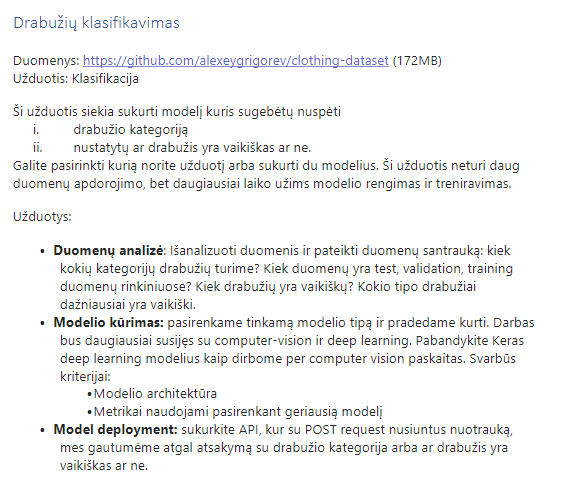

In [3]:
from IPython import display
display.Image("task.png")

In [73]:
data=pd.read_csv("images.csv")
data


image  sender_id     label   kids
0     4285fab0-751a-4b74-8e9b-43af05deee22        124  Not sure  False
1     ea7b6656-3f84-4eb3-9099-23e623fc1018        148   T-Shirt  False
2     00627a3f-0477-401c-95eb-92642cbe078d         94  Not sure  False
3     ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa         43   T-Shirt  False
4     3b86d877-2b9e-4c8b-a6a2-1d87513309d0        189     Shoes  False
...                                    ...        ...       ...    ...
5398  dfd4079d-967b-4b3e-8574-fbac11b58103        204    Shorts  False
5399  befa14be-8140-4faf-8061-1039947e329d        204      Body   True
5400  5379356a-40ee-4890-b416-2336a7d84061        310    Shorts  False
5401  65507fb8-3456-4c15-b53e-d1b03bf71a59        204     Shoes  False
5402  32b99302-cec7-4dec-adfa-3d4029674209        204     Skirt  False

[5403 rows x 4 columns]

In [74]:
data["photo"]='images/'+data["image"]+'.jpg'
data

image  sender_id     label   kids  \
0     4285fab0-751a-4b74-8e9b-43af05deee22        124  Not sure  False   
1     ea7b6656-3f84-4eb3-9099-23e623fc1018        148   T-Shirt  False   
2     00627a3f-0477-401c-95eb-92642cbe078d         94  Not sure  False   
3     ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa         43   T-Shirt  False   
4     3b86d877-2b9e-4c8b-a6a2-1d87513309d0        189     Shoes  False   
...                                    ...        ...       ...    ...   
5398  dfd4079d-967b-4b3e-8574-fbac11b58103        204    Shorts  False   
5399  befa14be-8140-4faf-8061-1039947e329d        204      Body   True   
5400  5379356a-40ee-4890-b416-2336a7d84061        310    Shorts  False   
5401  65507fb8-3456-4c15-b53e-d1b03bf71a59        204     Shoes  False   
5402  32b99302-cec7-4dec-adfa-3d4029674209        204     Skirt  False   

                                                photo  
0     images/4285fab0-751a-4b74-8e9b-43af05deee22.jpg  
1     images/ea7b6656-3f84-4eb3-9099-23e623fc1018.jpg  
2     images/00627a3f-0477-401c-95eb-92642cbe078d.jpg  
3     images/ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa.jpg  
4     images/3b86d877-2b9e-4c8b-a6a2-1d87513309d0.jpg  
...                                               ...  
5398  images/dfd4079d-967b-4b3e-8574-fbac11b58103.jpg  
5399  images/befa14be-8140-4faf-8061-1039947e329d.jpg  
5400  images/5379356a-40ee-4890-b416-2336a7d84061.jpg  
5401  images/65507fb8-3456-4c15-b53e-d1b03bf71a59.jpg  
5402  images/32b99302-cec7-4dec-adfa-3d4029674209.jpg  

[5403 rows x 5 columns]

In [75]:
import matplotlib.pylab as plt
import numpy as np
IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_CHANNELS = 3
def read_and_decode(filename, reshape_dims):
  # Read the file
  img = tf.io.read_file(filename)
  # Convert the compressed string to a 3D uint8 tensor.
  img = tf.image.decode_jpeg(img, channels=IMG_CHANNELS)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # Resize the image to the desired size.
  return tf.image.resize(img, reshape_dims)

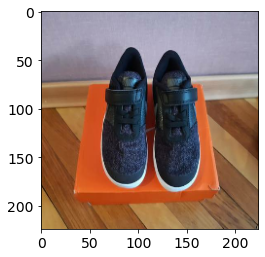

In [76]:
def show_image(filename):
    img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])
    plt.imshow((img.numpy()));

show_image("images/0bacb2c4-3d90-4835-b23e-aa7c2284d1bc.jpg")

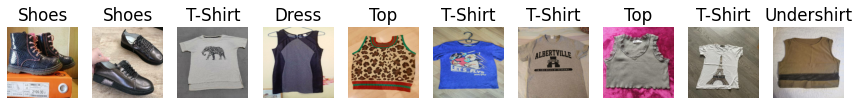

In [79]:
f, ax = plt.subplots(1, 10, figsize=(15,15))
for idx, filename in enumerate(data["photo"][50:60]):
    #print(filename, idx)
    img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])
    ax[idx].imshow((img.numpy()));
    ax[idx].set_title(data["label"][50+idx])
    ax[idx].axis('off')

In [81]:
data[data["photo"]=="images/e912d309-20d4-44c1-887d-43c4e59c76be.jpg"]

image  sender_id    label   kids  \
55  e912d309-20d4-44c1-887d-43c4e59c76be         78  T-Shirt  False   

                                              photo  
55  images/e912d309-20d4-44c1-887d-43c4e59c76be.jpg

In [82]:
data.label.value_counts() #yra 228 Not Sure kategorijos drabuziai, daugiausia yra marskineliu, ir ilgomis rankovemis maikuciu

T-Shirt       1011
Longsleeve     699
Pants          692
Shoes          431
Shirt          378
Dress          357
Outwear        312
Shorts         308
Not sure       228
Hat            171
Skirt          155
Polo           120
Undershirt     118
Blazer         109
Hoodie         100
Body            69
Other           67
Top             43
Blouse          23
Skip            12
Name: label, dtype: int64

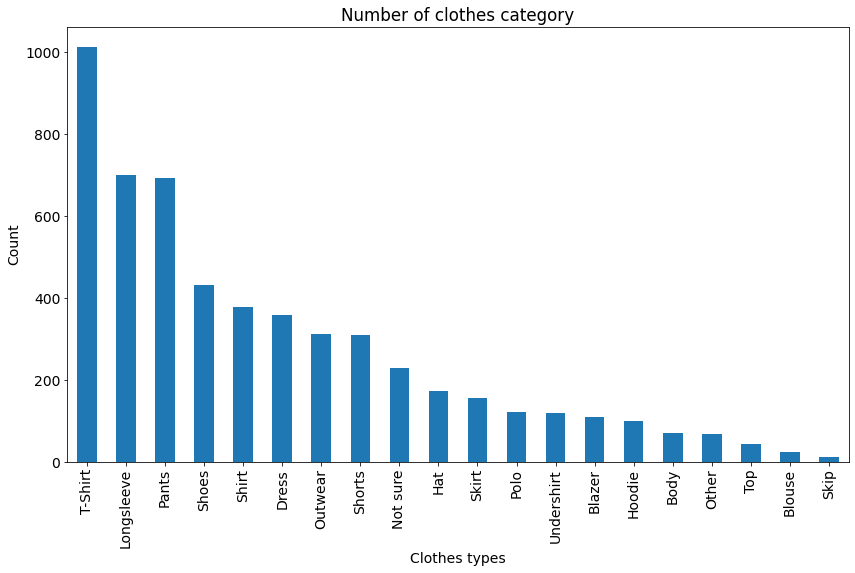

In [88]:
ax = data['label'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of clothes category")
ax.set_xlabel("Clothes types")
ax.set_ylabel("Count");

Yra 20 drabuziu kategoriju. Yra 228 nuotraukos, kurios yra Not sure pavadinimu, todel as jas pasalinsiu. Paskui jas panaudosiu sukurtame modelyje, kad atskirciau, koks yra ten drabuzis. Buvo pastebeta, kad tarp Skip kategorijos drabuziu buvo tokiu eiluciu su failu pavadinimu, kokiu failu nebuvo images folderyje. 

In [89]:
data.kids.value_counts()

False    4927
True      476
Name: kids, dtype: int64

Yra 476 vaikiški drabužiai ir 4927 nevaikiški pradiniame duomenų rinkinyje, bet ši informacija bus neaktuali tolimesniuose žingsniuose

Nezinomas reiksmes pasalinsiu

In [94]:
data_new=data[data.label!="Not sure"] # Not sure reiksmes pasalinu
data_new=data_new[data_new.label!="Skip"] # Skip reiksmes pasalinu

In [95]:
data_new

image  sender_id    label   kids  \
1     ea7b6656-3f84-4eb3-9099-23e623fc1018        148  T-Shirt  False   
3     ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa         43  T-Shirt  False   
4     3b86d877-2b9e-4c8b-a6a2-1d87513309d0        189    Shoes  False   
5     5d3a1404-697f-479f-9090-c1ecd0413d27        138   Shorts  False   
6     b0c03127-9dfb-4573-8934-1958396937bf        138    Shirt  False   
...                                    ...        ...      ...    ...   
5398  dfd4079d-967b-4b3e-8574-fbac11b58103        204   Shorts  False   
5399  befa14be-8140-4faf-8061-1039947e329d        204     Body   True   
5400  5379356a-40ee-4890-b416-2336a7d84061        310   Shorts  False   
5401  65507fb8-3456-4c15-b53e-d1b03bf71a59        204    Shoes  False   
5402  32b99302-cec7-4dec-adfa-3d4029674209        204    Skirt  False   

                                                photo  
1     images/ea7b6656-3f84-4eb3-9099-23e623fc1018.jpg  
3     images/ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa.jpg  
4     images/3b86d877-2b9e-4c8b-a6a2-1d87513309d0.jpg  
5     images/5d3a1404-697f-479f-9090-c1ecd0413d27.jpg  
6     images/b0c03127-9dfb-4573-8934-1958396937bf.jpg  
...                                               ...  
5398  images/dfd4079d-967b-4b3e-8574-fbac11b58103.jpg  
5399  images/befa14be-8140-4faf-8061-1039947e329d.jpg  
5400  images/5379356a-40ee-4890-b416-2336a7d84061.jpg  
5401  images/65507fb8-3456-4c15-b53e-d1b03bf71a59.jpg  
5402  images/32b99302-cec7-4dec-adfa-3d4029674209.jpg  

[5163 rows x 5 columns]

Patikrinau ar visi isvardinti nuotrauku failai yra images folderyje.

In [96]:
import os
yra=[]
for index,file in enumerate(data_new["photo"]):
    yra.append(os.path.exists(file))


In [97]:
yra.count(False) #visi failai yra, viskas gerai

0

In [98]:
data_new.kids.value_counts() # yra 468 vaikiski drabuziai.

False    4695
True      468
Name: kids, dtype: int64

Patikrinama Other drabuziu kategorija

In [100]:
kita=data_new[data_new.label=="Other"]
kita=kita.reset_index()

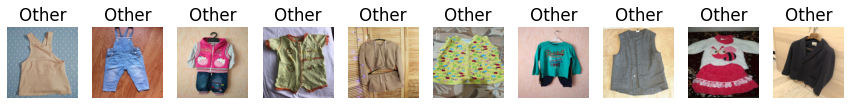

In [101]:
f, ax = plt.subplots(1, 10, figsize=(15,15))
for idx, filename in enumerate(kita["photo"][20:30]):
    img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])
    #print(ax)
    ax[idx].imshow((img.numpy()));
    ax[idx].set_title(kita["label"][20+idx])
    ax[idx].axis('off')

Other kategorija irgi pasalinu, nes joje yra ivairiu drabuziu: Svarku, pirstiniu, kostiumeliu, kombinezonu ir kita.

In [102]:
data_new=data_new[data_new.label!="Other"]
data_new.reset_index(inplace=True)

In [103]:
data_new.label.value_counts()

T-Shirt       1011
Longsleeve     699
Pants          692
Shoes          431
Shirt          378
Dress          357
Outwear        312
Shorts         308
Hat            171
Skirt          155
Polo           120
Undershirt     118
Blazer         109
Hoodie         100
Body            69
Top             43
Blouse          23
Name: label, dtype: int64

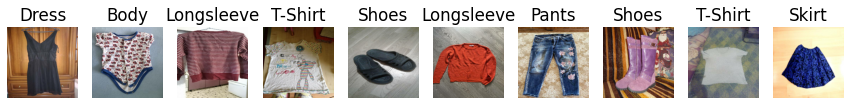

In [104]:
f, ax = plt.subplots(1, 10, figsize=(15,15))
for idx, filename in enumerate(data_new["photo"][20:30]):
    img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])
    #print(ax)
    ax[idx].imshow((img.numpy()));
    ax[idx].set_title(data_new["label"][20+idx])
    ax[idx].axis('off')

# Paimsiu 5 didziausias kategorijas kolkas ir bandysiu padaryti modeli.

In [108]:
sar=["T-Shirt", "Longsleeve", "Pants", "Shoes", "Shirt"] #, "Dress", "Outwear", "Shorts"]

small_data=data_new.loc[data_new.label.isin(sar)]
small_data.reset_index(inplace=True)
small_data #yra 3211 eiluciu

level_0  index                                 image  sender_id  \
0           0      1  ea7b6656-3f84-4eb3-9099-23e623fc1018        148   
1           1      3  ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa         43   
2           2      4  3b86d877-2b9e-4c8b-a6a2-1d87513309d0        189   
3           4      6  b0c03127-9dfb-4573-8934-1958396937bf        138   
4           5      7  4c8f245e-a039-46fd-a6b9-1bb51e83fc05        226   
...       ...    ...                                   ...        ...   
3206     5085   5392  29cffc8e-5e72-4b73-bbc0-20b9f1251bc2        204   
3207     5087   5394  575fc7c5-aa65-46c6-a343-35113c150129        310   
3208     5088   5395  acf7a391-8450-453d-898b-2a4a9d2886f6        204   
3209     5090   5397  3855ea22-5e7f-411f-b1fa-6db27a676c06        204   
3210     5094   5401  65507fb8-3456-4c15-b53e-d1b03bf71a59        204   

           label   kids                                            photo  
0        T-Shirt  False  images/ea7b6656-3f84-4eb3-9099-23e623fc1018.jpg  
1        T-Shirt  False  images/ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa.jpg  
2          Shoes  False  images/3b86d877-2b9e-4c8b-a6a2-1d87513309d0.jpg  
3          Shirt  False  images/b0c03127-9dfb-4573-8934-1958396937bf.jpg  
4        T-Shirt  False  images/4c8f245e-a039-46fd-a6b9-1bb51e83fc05.jpg  
...          ...    ...                                              ...  
3206     T-Shirt  False  images/29cffc8e-5e72-4b73-bbc0-20b9f1251bc2.jpg  
3207       Shirt  False  images/575fc7c5-aa65-46c6-a343-35113c150129.jpg  
3208  Longsleeve  False  images/acf7a391-8450-453d-898b-2a4a9d2886f6.jpg  
3209       Shoes   True  images/3855ea22-5e7f-411f-b1fa-6db27a676c06.jpg  
3210       Shoes  False  images/65507fb8-3456-4c15-b53e-d1b03bf71a59.jpg  

[3211 rows x 7 columns]

In [110]:
sd=small_data[["photo", "label"]]
sd

photo       label
0     images/ea7b6656-3f84-4eb3-9099-23e623fc1018.jpg     T-Shirt
1     images/ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa.jpg     T-Shirt
2     images/3b86d877-2b9e-4c8b-a6a2-1d87513309d0.jpg       Shoes
3     images/b0c03127-9dfb-4573-8934-1958396937bf.jpg       Shirt
4     images/4c8f245e-a039-46fd-a6b9-1bb51e83fc05.jpg     T-Shirt
...                                               ...         ...
3206  images/29cffc8e-5e72-4b73-bbc0-20b9f1251bc2.jpg     T-Shirt
3207  images/575fc7c5-aa65-46c6-a343-35113c150129.jpg       Shirt
3208  images/acf7a391-8450-453d-898b-2a4a9d2886f6.jpg  Longsleeve
3209  images/3855ea22-5e7f-411f-b1fa-6db27a676c06.jpg       Shoes
3210  images/65507fb8-3456-4c15-b53e-d1b03bf71a59.jpg       Shoes

[3211 rows x 2 columns]

In [146]:

train, test = train_test_split(sd, test_size=0.2, random_state=100)

In [147]:
train

photo       label
2213  images/ae7ec1a1-47e3-4ff4-af90-50fa4bef4d4e.jpg     T-Shirt
937   images/b8c71b29-9989-4d27-8274-cdb9a813a6d5.jpg  Longsleeve
2479  images/5ca1e689-1dae-48c3-9b8b-b47a3365cc01.jpg  Longsleeve
1639  images/9760ea86-277b-4291-be10-03141e3b1ecb.jpg       Pants
168   images/ef4afaa2-ce6f-4063-83ad-beac8d201e67.jpg       Shirt
...                                               ...         ...
1930  images/fe7ca6a3-50a8-4377-9e67-a80652d1594a.jpg       Shirt
79    images/2fb12663-3f0a-407f-8bdf-e366d62d459a.jpg     T-Shirt
1859  images/e7ec7ab5-494f-417c-a0ce-c7bbef93d745.jpg       Shirt
2840  images/d1ee3196-3069-4bd9-8a36-507bc2302d14.jpg  Longsleeve
1544  images/626ea40f-13c8-464a-aa44-eb9b9c1ef5c9.jpg     T-Shirt

[2568 rows x 2 columns]

In [148]:
train.to_csv('train.csv', index=False, header=False) # issaugau nauja csv faila, kad paskui galeciau ta dataset naudoti modeliui
test.to_csv('test.csv', index=False, header=False)

In [182]:
def decode_csv(csv_row):
    record_defaults = ["photo", "label"]
    filename, label_string = tf.io.decode_csv(csv_row, record_defaults)
    img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])
    label = tf.argmax(tf.math.equal(sar, label_string))
    return img, label

train_dataset = (tf.data.TextLineDataset(
    "train.csv").map(decode_csv)).batch(10)

test_dataset = (tf.data.TextLineDataset(
    "test.csv").map(decode_csv)).batch(10)

# Modelio kurimas

In [150]:
for img, label in test_dataset.take(3):  #veikia duomenys
    print(img, label)

tf.Tensor(
[[[[0.27879372 0.22781333 0.20428392]
   [0.2663675  0.2153871  0.1918577 ]
   [0.28832254 0.23734213 0.21381272]
   ...
   [0.47086832 0.4784314  0.47436982]
   [0.48487383 0.48487383 0.4770307 ]
   [0.45318276 0.45318276 0.44533962]]

  [[0.29003856 0.23905814 0.21552873]
   [0.27548146 0.22450107 0.20097166]
   [0.2938288  0.24284841 0.219319  ]
   ...
   [0.47505155 0.48261464 0.47855306]
   [0.48579708 0.48579708 0.47795394]
   [0.45419285 0.45419285 0.4463497 ]]

  [[0.30301997 0.25203958 0.22851017]
   [0.28803396 0.23705359 0.21352418]
   [0.2993785  0.24839813 0.22486871]
   ...
   [0.48040807 0.4879712  0.48390958]
   [0.490941   0.490941   0.48309785]
   [0.4596025  0.4596025  0.45175937]]

  ...

  [[0.45114657 0.40799236 0.37401107]
   [0.43137258 0.3921569  0.35686275]
   [0.4389356  0.39593843 0.3719888 ]
   ...
   [0.4604258  0.454745   0.4521796 ]
   [0.43419087 0.42851007 0.42594466]
   [0.4233108  0.41763    0.4150646 ]]

  [[0.4533949  0.39478445 0.367226

In [158]:
matplotlib.rcParams.update({'font.size': 15})
def training_plot_simple(metrics, history):
    f, ax = plt.subplots(1, len(metrics), figsize=(15,5))
    for idx, metric in enumerate(metrics):
        ax[idx].plot(history.history[metric])
        ax[idx].set_xlabel("Epochs")
        # ax[idx].set_ylabel(metric, fontweight='bold', fontsize=20)
        ax[idx].plot(history.history['val_' + metric], ls='dashed');
        ax[idx].legend([metric, 'val_' + metric], fontsize=20)

## Tiesinis modelis

Pradedu nuo paprasčiausio modelio - tiesinio. Visi paveikslėlio pixeliai yra ištiesiami į vieną eilutę su daug stulpelių: n x 224 x 224 x 3 -> n x 150528 ir tada 150528 stulpeliai suspaudžiami į 5, nes yra 5 atrinktos drabužių kategorijos

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 150528)            0         
                                                                 
 dense_21 (Dense)            (None, 5)                 752645    
                                                                 
Total params: 752,645
Trainable params: 752,645
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
257/257 [==============================] - 16s 61ms/step - loss: 20.8838 - accuracy: 0.3703 - val_loss: 10.2302 - val_accuracy: 0.4883
Epoch 2/10
257/257 [==============================] - 14s 56ms/step - loss: 13.3087 - accuracy: 0.4490 - val_loss: 20.4035 - val_accuracy: 0.2908
Epoch 3/10
257/257 [==============================] - 15s 57ms/step - loss: 14.6120 - accuracy: 0.4731 - val_loss: 9.8140 - val_accuracy: 0.5365
Epoch 

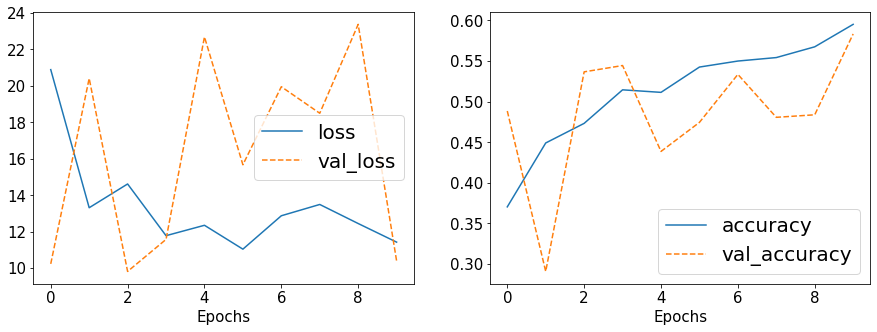

In [152]:
model_linear = tf.keras.Sequential([
              tf.keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
              tf.keras.layers.Dense(5, activation='softmax')
])
model_linear.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

model_linear.summary()

history = model_linear.fit(train_dataset, validation_data=test_dataset, epochs=10)

training_plot_simple(['loss', 'accuracy'], history);

Įvertinus tiesinį modelį, iš grafikų matosi, kad visos kreivės yra svyruojančios. Validation_accuracy ir validation_loss kreivės iš vis zigzaguoja labai ir tai rodo, kad modelis nėra geras. Ties 5 epocha (4 grafike) Accuracy treniruojamų duomenų sumažėja šiek tiek, tai modelis jau persimoko. Vertinant vidurkį, modelio tikslumas būtų maždaug apie 50%, kad nėra labai blogas variantas. Bet pabandysiu modelį pagerinti.

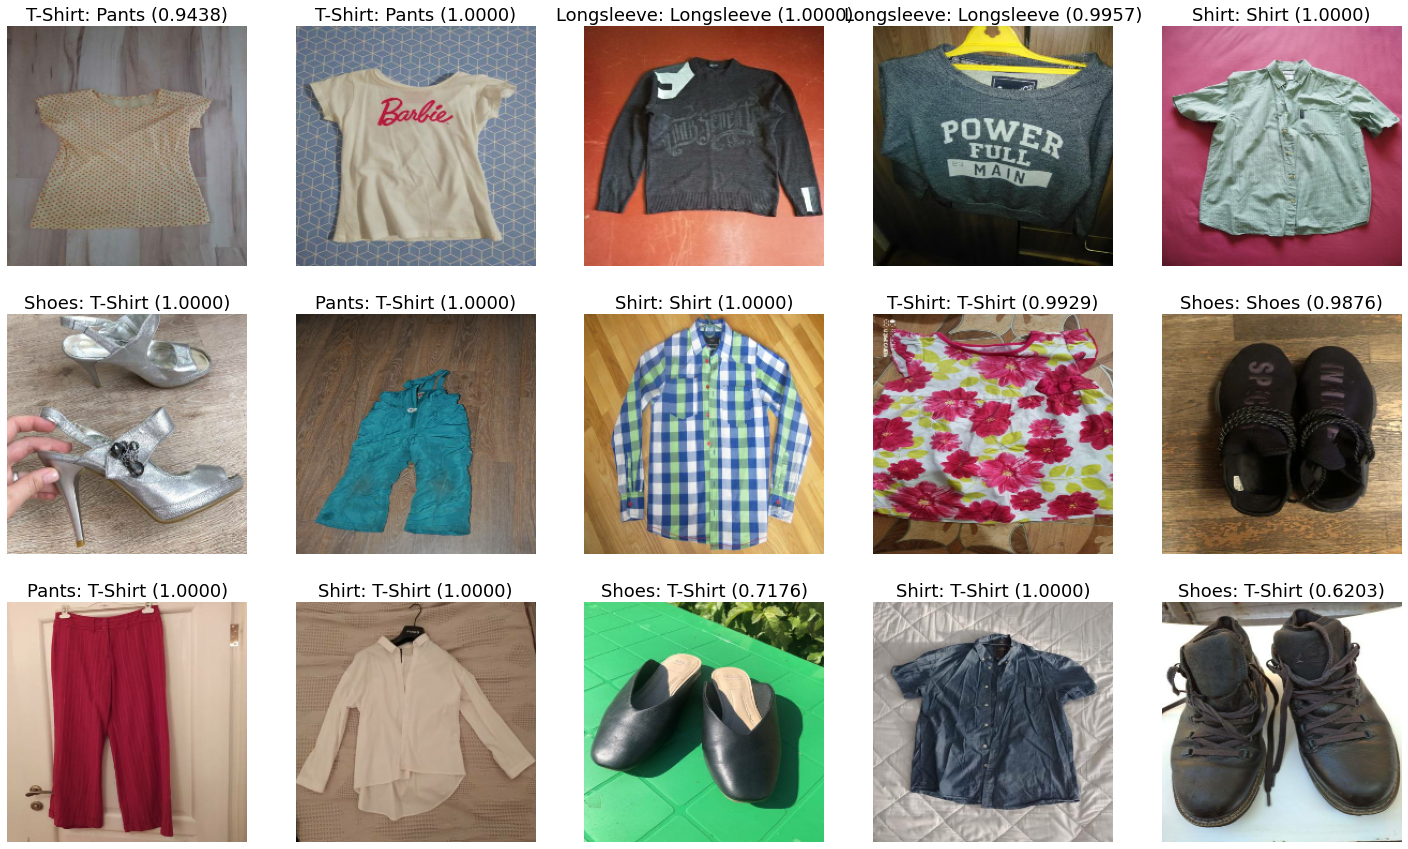

In [159]:

# Call model.predict() on a few images in the evaluation dataset
def plot_predictions(model, filename):
    f, ax = plt.subplots(3, 5, figsize=(25,15))
    dataset = (tf.data.TextLineDataset(filename).map(decode_csv))
    for idx, (img, label) in enumerate(dataset.take(15)):
        ax[idx//5, idx%5].imshow((img.numpy()));
        batch_image = tf.reshape(img, [1, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS])
        batch_pred = model.predict(batch_image)
        pred = batch_pred[0]
        label = sar[label.numpy()]
        pred_label_index = tf.math.argmax(pred).numpy()
        pred_label = sar[pred_label_index]
        prob = pred[pred_label_index]
        ax[idx//5, idx%5].set_title('{}: {} ({:.4f})'.format(label, pred_label, prob))
        ax[idx//5, idx%5].axis('off')

plot_predictions(model_linear, "test.csv")

Žiūrint, kiekvienos nuotraukos prognozę atskirai, bent jau šiuo atveju, tai dauguma drabužių nesutampa.

## Pridedu vieną paslėptą sluoksnį modeliui, kuriame 150528  reikšmės susispaudžia  ->  64 reikšmės -> 5 (drabužių kategorijų skaičius)         
                                                                 

Epoch 1/10
257/257 [==============================] - 32s 122ms/step - loss: 7.9869 - accuracy: 0.3559 - val_loss: 3.1680 - val_accuracy: 0.5257
Epoch 2/10
257/257 [==============================] - 33s 129ms/step - loss: 3.3896 - accuracy: 0.4237 - val_loss: 2.3706 - val_accuracy: 0.4417
Epoch 3/10
257/257 [==============================] - 32s 126ms/step - loss: 2.7982 - accuracy: 0.4459 - val_loss: 1.6060 - val_accuracy: 0.2146
Epoch 4/10
257/257 [==============================] - 31s 122ms/step - loss: 1.5975 - accuracy: 0.2469 - val_loss: 1.5889 - val_accuracy: 0.3344
Epoch 5/10
257/257 [==============================] - 31s 119ms/step - loss: 1.5794 - accuracy: 0.3100 - val_loss: 1.5735 - val_accuracy: 0.3344
Epoch 6/10
257/257 [==============================] - 32s 123ms/step - loss: 1.5670 - accuracy: 0.3100 - val_loss: 1.5632 - val_accuracy: 0.3344
Epoch 7/10
257/257 [==============================] - 31s 119ms/step - loss: 1.5589 - accuracy: 0.3100 - val_loss: 1.5567 - val_ac

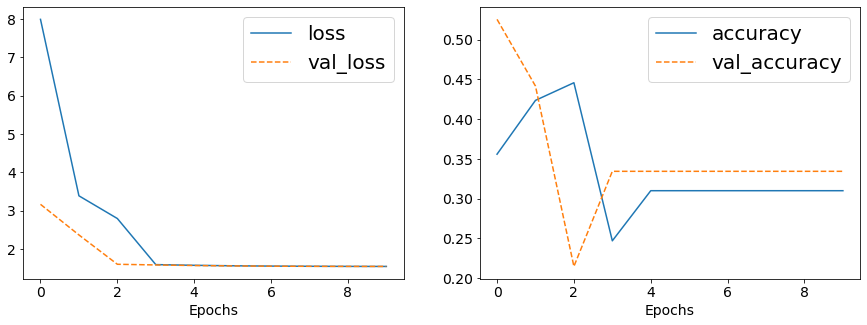

In [156]:
# NN with one hidden layer
model = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
          tf.keras.layers.Dense(64, activation=tf.keras.activations.relu),
          tf.keras.layers.Dense(len(sar), activation='softmax')
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = model.fit(train_dataset, validation_data=test_dataset, epochs=10)

training_plot_simple(['loss', 'accuracy'], history)

Modelis su vienu paslėptu sluoksniu dar blogiau prognozuoja, o validation_accuracy žymiai blogesnis, nei tiesinio modelio. iki 5 epochos vėlgi vyksta svyravimas Accuracy grafikuose, ir po 5 epochos modelis jau nebesimoko daugiau.

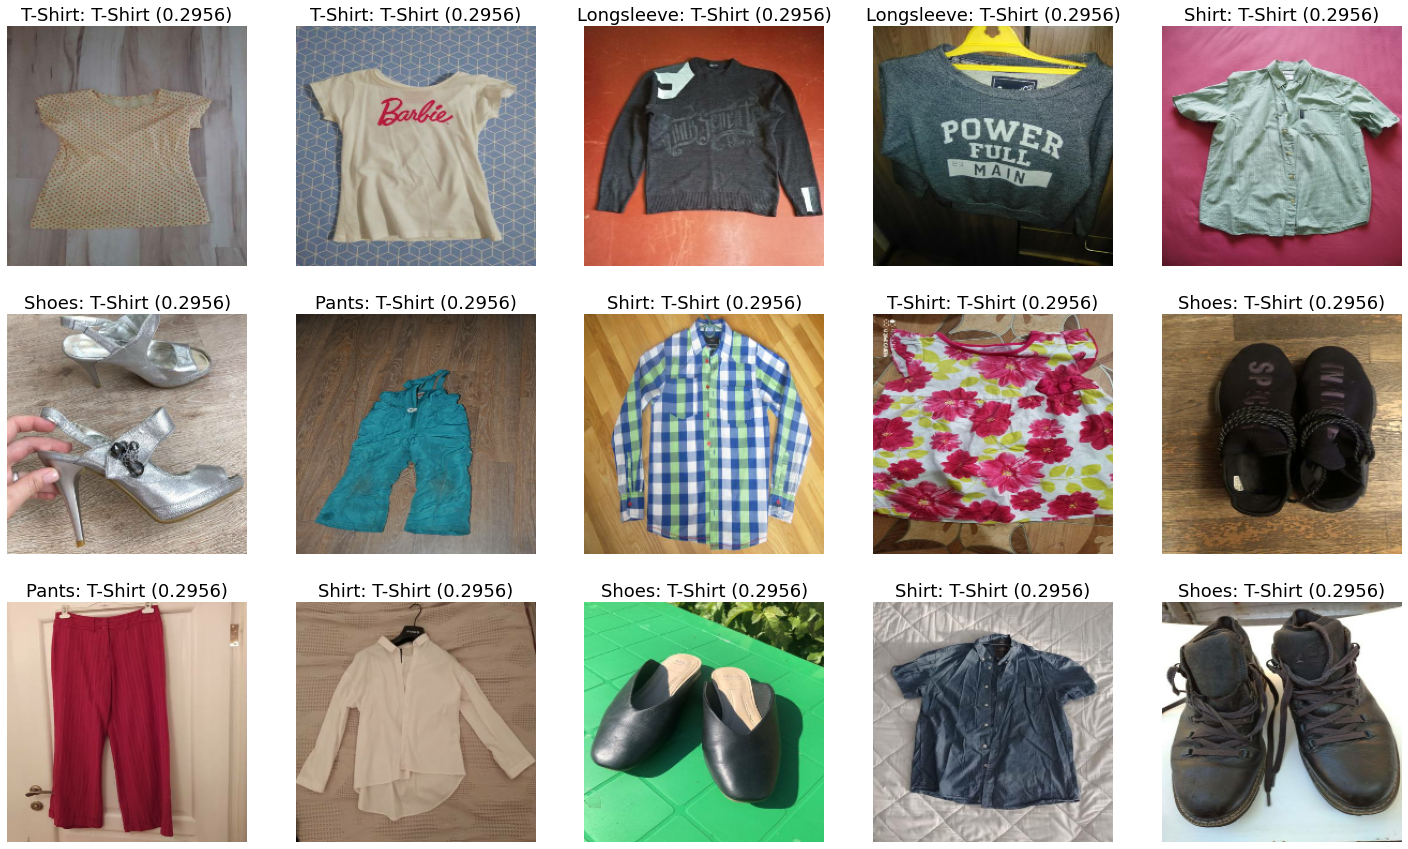

In [160]:
plot_predictions(model, "test.csv")

Modelis gerai atpažino tik T-shirt kategorijos drabužius, kitų visai nepataikė.

## Modelis papildomas regularizeriais, pridedamas learning_rate

In [ ]:
# parameterize to the values in the previous cell
def train_and_evaluate(batch_size = 10,
                       lrate = 0.0001, # default in Adam constructor
                       l1 = 0,
                       l2 = 0,
                       num_hidden = 128):
    regularizer = tf.keras.regularizers.l1_l2(l1, l2)



# NN with one hidden layers
    model = tf.keras.Sequential([
              tf.keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
              tf.keras.layers.Dense(num_hidden,
                                    kernel_regularizer=regularizer, 
                                    activation=tf.keras.activations.relu),
              tf.keras.layers.Dense(len(sar), 
                                    kernel_regularizer=regularizer,
                                    activation='softmax')
  ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lrate),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics=['accuracy'])
    
    history = model.fit(train_dataset, validation_data=test_dataset, epochs=10)
    training_plot_simple(['loss', 'accuracy'], history)
    return model

Epoch 1/10
257/257 [==============================] - 39s 149ms/step - loss: 2.3280 - accuracy: 0.4050 - val_loss: 1.5347 - val_accuracy: 0.5070
Epoch 2/10
257/257 [==============================] - 38s 147ms/step - loss: 1.6374 - accuracy: 0.4938 - val_loss: 1.2827 - val_accuracy: 0.5708
Epoch 3/10
257/257 [==============================] - 37s 143ms/step - loss: 1.4483 - accuracy: 0.5273 - val_loss: 1.3322 - val_accuracy: 0.5505
Epoch 4/10
257/257 [==============================] - 45s 176ms/step - loss: 1.3470 - accuracy: 0.5440 - val_loss: 1.3264 - val_accuracy: 0.5474
Epoch 5/10
257/257 [==============================] - 45s 176ms/step - loss: 1.2611 - accuracy: 0.5720 - val_loss: 1.3151 - val_accuracy: 0.5412
Epoch 6/10
257/257 [==============================] - 35s 135ms/step - loss: 1.1218 - accuracy: 0.6063 - val_loss: 1.2802 - val_accuracy: 0.5537
Epoch 7/10
257/257 [==============================] - 36s 141ms/step - loss: 1.0246 - accuracy: 0.6266 - val_loss: 1.2070 - val_ac

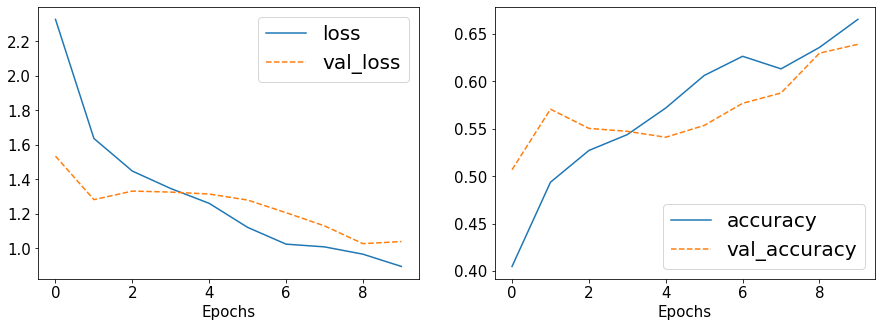

In [163]:
model = train_and_evaluate()

Pagerinus modelį rezultatai jau pastebimai pagerėjo, nebėra tokio didelio šokinėjimo su naujais duomenimis. Tačiau ties 8 epocha ir treniruojamų duomenų tikslumas pakrenta. Bet modelis su kiekviena epocha jau gerėja.

### Pabandysiu pridėti nebe nulines regularizer reikšmes, pažiūrėsiu ar tai kažką pakeis, taip pat padidinau šiek tiek learning rate

Epoch 1/10
257/257 [==============================] - 57s 219ms/step - loss: 14.4034 - accuracy: 0.3470 - val_loss: 9.0115 - val_accuracy: 0.4961
Epoch 2/10
257/257 [==============================] - 56s 216ms/step - loss: 9.9633 - accuracy: 0.4089 - val_loss: 9.6721 - val_accuracy: 0.4215
Epoch 3/10
257/257 [==============================] - 56s 217ms/step - loss: 8.9097 - accuracy: 0.4287 - val_loss: 20.8360 - val_accuracy: 0.4028
Epoch 4/10
257/257 [==============================] - 56s 219ms/step - loss: 7.1887 - accuracy: 0.4159 - val_loss: 5.6383 - val_accuracy: 0.3344
Epoch 5/10
257/257 [==============================] - 55s 214ms/step - loss: 4.5944 - accuracy: 0.4455 - val_loss: 4.9897 - val_accuracy: 0.4012
Epoch 6/10
257/257 [==============================] - 56s 216ms/step - loss: 3.6137 - accuracy: 0.4766 - val_loss: 3.7418 - val_accuracy: 0.4417
Epoch 7/10
257/257 [==============================] - 61s 237ms/step - loss: 3.0023 - accuracy: 0.4700 - val_loss: 2.7676 - val_

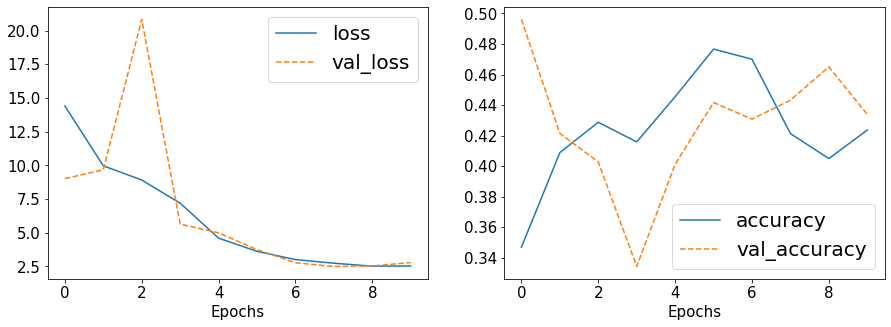

In [164]:
model_regul = train_and_evaluate( lrate=0.0005, l1=0.0001, l2=0, num_hidden=128)

Epoch 1/10
257/257 [==============================] - 57s 218ms/step - loss: 11.3734 - accuracy: 0.3777 - val_loss: 11.2402 - val_accuracy: 0.3655
Epoch 2/10
257/257 [==============================] - 58s 225ms/step - loss: 6.6515 - accuracy: 0.4474 - val_loss: 8.5657 - val_accuracy: 0.3064
Epoch 3/10
257/257 [==============================] - 56s 218ms/step - loss: 5.1750 - accuracy: 0.4618 - val_loss: 4.1091 - val_accuracy: 0.4199
Epoch 4/10
257/257 [==============================] - 54s 211ms/step - loss: 2.7116 - accuracy: 0.4762 - val_loss: 2.9367 - val_accuracy: 0.3157
Epoch 5/10
257/257 [==============================] - 54s 208ms/step - loss: 1.7459 - accuracy: 0.4233 - val_loss: 1.4712 - val_accuracy: 0.4635
Epoch 6/10
257/257 [==============================] - 53s 207ms/step - loss: 1.4148 - accuracy: 0.4322 - val_loss: 1.4273 - val_accuracy: 0.4432
Epoch 7/10
257/257 [==============================] - 53s 206ms/step - loss: 1.3914 - accuracy: 0.4381 - val_loss: 1.4153 - val_

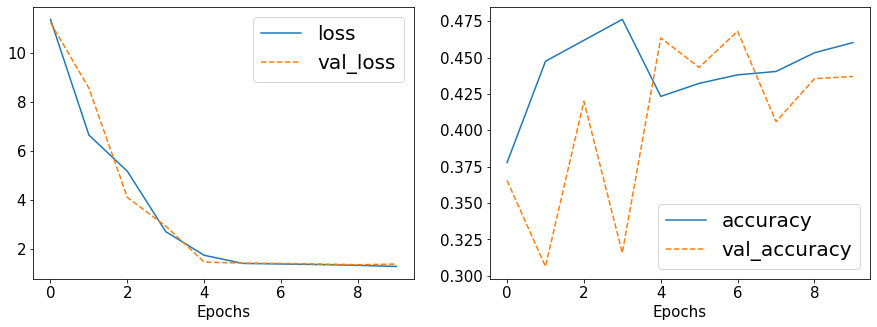

In [165]:
model_regul2 = train_and_evaluate( lrate=0.0005, l1=0, l2=0.0001, num_hidden=128)

Na geresnis modelis gavosi, kaip abu L1 ir L2 parametrai 0 buvo.

## Modelis papildomas, taip kad būtų galima kelis paslėptus sluoksnius įtraukti

In [174]:

def train_and_evaluate_multihidden(batch_size = 10,
                       lrate = 0.0001,
                       l1 = 0,
                       l2 = 0,
                       num_hidden = [256, 64]):
    regularizer = tf.keras.regularizers.l1_l2(l1, l2)


  # NN with multiple hidden layers
    layers = [tf.keras.layers.Flatten(
      input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS),
      name='input_pixels')]
    layers = layers + [
      tf.keras.layers.Dense(nodes,
                            kernel_regularizer=regularizer, 
                            activation=tf.keras.activations.relu,
                            name='hidden_dense_{}'.format(hno))
          for hno, nodes in enumerate(num_hidden)
    ]
    layers = layers + [
        tf.keras.layers.Dense(len(sar), 
                            kernel_regularizer=regularizer,
                            activation='softmax',
                            name='clothes_prob')
  ]

    model = tf.keras.Sequential(layers, name='clothes_classification')
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lrate),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(
                    from_logits=False), metrics=['accuracy'])
    print(model.summary())
    
    history = model.fit(train_dataset, validation_data=test_dataset, epochs=10)
    
    training_plot(['loss', 'accuracy'], history)
    return model


Model: "clothes_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_pixels (Flatten)      (None, 150528)            0         
                                                                 
 hidden_dense_0 (Dense)      (None, 256)               38535424  
                                                                 
 hidden_dense_1 (Dense)      (None, 64)                16448     
                                                                 
 clothes_prob (Dense)        (None, 5)                 325       
                                                                 
Total params: 38,552,197
Trainable params: 38,552,197
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
257/257 [==============================] - 54s 206ms/step - loss: 2.7060 - accuracy: 0.3719 - val_loss: 2.5543 - val_accuracy: 0.4292
Epoch 2/10
257

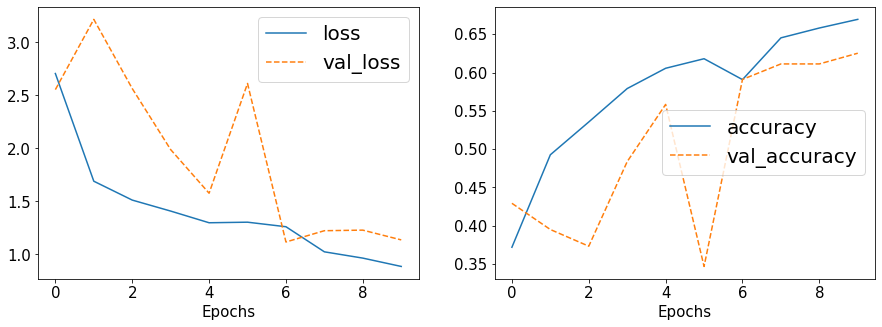

In [175]:

model_multi_hidden = train_and_evaluate_multihidden()

## Pridedamas dropout prie modelio

Model: "clothes_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_pixels (Flatten)      (None, 150528)            0         
                                                                 
 hidden_dense_0 (Dense)      (None, 256)               38535424  
                                                                 
 batchnorm_dense_0 (BatchNor  (None, 256)              512       
 malization)                                                     
                                                                 
 relu_dense_0 (Activation)   (None, 256)               0         
                                                                 
 dropout_dense_0 (Dropout)   (None, 256)               0         
                                                                 
 hidden_dense_1 (Dense)      (None, 64)                16448     
                                            

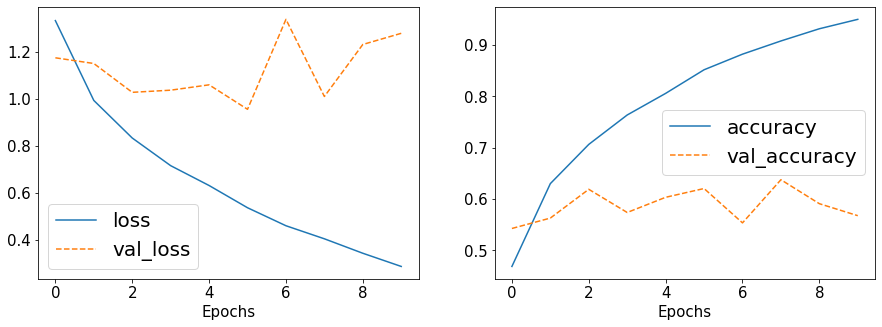

In [176]:
def train_and_evaluate_dropout(batch_size = 10,
                       lrate = 0.0001,
                       l1 = 0,
                       l2 = 0, #l2=0.0001
                       dropout_prob = 0.1,
                       num_hidden = [256,64]):
    regularizer = tf.keras.regularizers.l1_l2(l1, l2)



  # NN with multiple hidden layers
    layers = [tf.keras.layers.Flatten(
      input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS),
      name='input_pixels')]
    for hno, nodes in enumerate(num_hidden):
        layers.extend([
          tf.keras.layers.Dense(nodes,
                            kernel_regularizer=regularizer, 
                            name='hidden_dense_{}'.format(hno)),
          tf.keras.layers.BatchNormalization(scale=False, # ReLU
                                         center=False, # have bias in Dense
                                         name='batchnorm_dense_{}'.format(hno)),
      #move activation to come after batchnorm
          tf.keras.layers.Activation('relu', name='relu_dense_{}'.format(hno)),
          tf.keras.layers.Dropout(rate=dropout_prob,
                             name='dropout_dense_{}'.format(hno)),                         
        ])

    layers.append(
        tf.keras.layers.Dense(len(sar), 
                            kernel_regularizer=regularizer,
                            activation='softmax',
                            name='clothes_prob')
  )

    model = tf.keras.Sequential(layers, name='clothes_classification')
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lrate),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(
                    from_logits=False),
                metrics=['accuracy'])
    print(model.summary())
    history = model.fit(train_dataset, validation_data=test_dataset, epochs=10)
    training_plot(['loss', 'accuracy'], history)
    return model

model_dropout = train_and_evaluate_dropout()

Model: "clothes_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_pixels (Flatten)      (None, 150528)            0         
                                                                 
 hidden_dense_0 (Dense)      (None, 256)               38535424  
                                                                 
 batchnorm_dense_0 (BatchNor  (None, 256)              512       
 malization)                                                     
                                                                 
 relu_dense_0 (Activation)   (None, 256)               0         
                                                                 
 dropout_dense_0 (Dropout)   (None, 256)               0         
                                                                 
 hidden_dense_1 (Dense)      (None, 64)                16448     
                                            

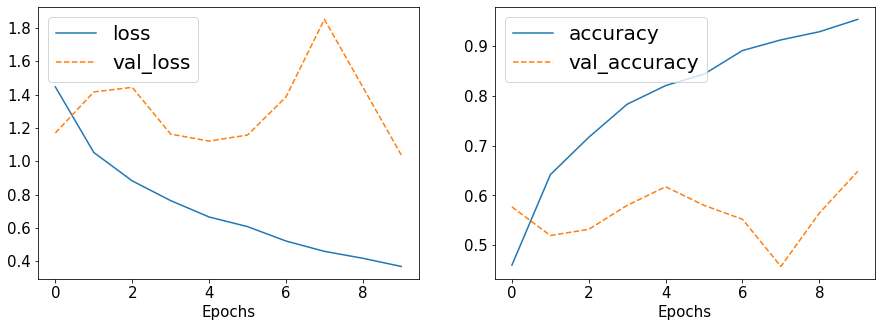

In [177]:
model_dropout = train_and_evaluate_dropout(l2=0.0001)

Modeliai vis tiek nėra geri, validation kreivės svyruoja. Pabandysiu Convolutional modelį. Naudojamas 2 kartus 3x3 filtras ir 2x2 max pooling operacija

## Convolutional modelis

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 54, 54, 32)       0         
 g2D)                                                            
                                                                 
 flatten_22 (Flatten)        (None, 93312)             0         
                                                                 
 dense_40 (Dense)            (None, 128)             

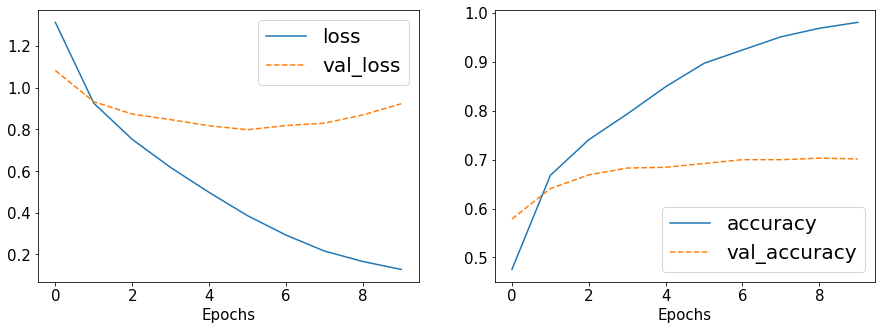

In [178]:
from keras.layers.core import Dense, Activation, Dropout
model_conv=Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(5, activation="softmax")
    ])

model_conv.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(
                    from_logits=False), metrics=['accuracy'])

print(model_conv.summary())


history = model_conv.fit(train_dataset, validation_data=test_dataset, epochs=10)
training_plot_simple(['loss', 'accuracy'], history)

Convolutional modelis jau visai geras yra, nebesvyruoja, nors aukštesnėse epochose validation loss ima po truputį didėti. Vall_accuracy pasiekė beveik 70% jau su 4 epocha ir toliau tikslumo augimas buvo labai minimalus. Modelį vertinčiau jau kaip pakankamai gerą, lyginant su ankstesniais.

## MobileNet V2 versija

MobileNet modeliai jau yra ištreniruoti, jiems mokinti yra naudojami dideli nuotraukų kiekiai, modeliai sudėtingi. Juos apmokyti užtrunka daug laiko ir reikia daug resursų. Pabandysiu pritaikyti jau ištreniruotą MobileNet modelį šiam drabužių kategorizavimo uždaviniui. Modelis pritaikomas anksčiau jau naudoties duomenims, su 5 skirtingomis drabužių kategorijomis.

In [183]:
import tensorflow_hub as hub
import os
# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

# parameterize to the values in the previous cell
def train_and_evaluate_mobile(batch_size = 10,
                       lrate = 0.0005,
                       l1 = 0,
                       l2 = 0.0001,
                       dropout_prob = 0.1,
                       num_hidden = 32):
    regularizer = tf.keras.regularizers.l1_l2(l1, l2)

    layers = [
      hub.KerasLayer(
          "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
          input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS),
          trainable=False,
          name='mobilenet_embedding'),
      tf.keras.layers.Dense(num_hidden,
                            kernel_regularizer=regularizer, 
                            activation='relu',
                            name='dense_hidden'),
      tf.keras.layers.Dense(len(sar), 
                            kernel_regularizer=regularizer,
                            activation='softmax',
                            name='clothes_prob')
  ]

    model = tf.keras.Sequential(layers, name='clothes_classification')
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lrate),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(
                    from_logits=False),
                metrics=['accuracy'])
    print(model.summary())
    history = model.fit(train_dataset, validation_data=test_dataset, epochs=5)
    training_plot(['loss', 'accuracy'], history)
    return model

Model: "clothes_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_embedding (KerasL  (None, 1280)             2257984   
 ayer)                                                           
                                                                 
 dense_hidden (Dense)        (None, 32)                40992     
                                                                 
 clothes_prob (Dense)        (None, 5)                 165       
                                                                 
Total params: 2,299,141
Trainable params: 41,157
Non-trainable params: 2,257,984
_________________________________________________________________
None
Epoch 1/5
257/257 [==============================] - 96s 357ms/step - loss: 0.4577 - accuracy: 0.8294 - val_loss: 0.2797 - val_accuracy: 0.9067
Epoch 2/5
257/257 [==============================] - 96s 374ms/step - loss: 0.

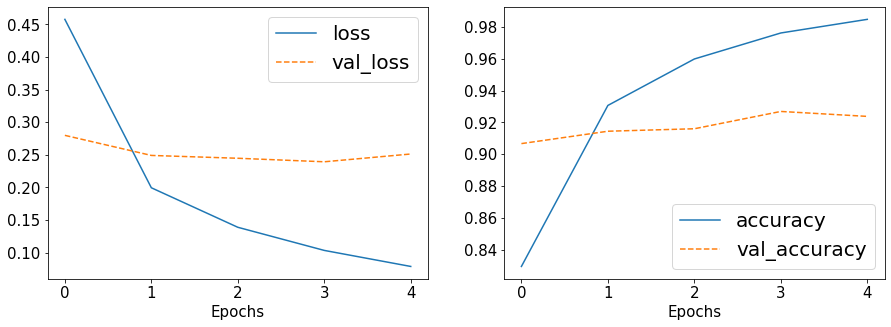

In [184]:
model_mobile = train_and_evaluate_mobile()

Model: "clothes_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_embedding (KerasL  (None, 1280)             2257984   
 ayer)                                                           
                                                                 
 dense_hidden (Dense)        (None, 32)                40992     
                                                                 
 clothes_prob (Dense)        (None, 5)                 165       
                                                                 
Total params: 2,299,141
Trainable params: 41,157
Non-trainable params: 2,257,984
_________________________________________________________________
None
Epoch 1/5
257/257 [==============================] - 98s 364ms/step - loss: 0.4713 - accuracy: 0.8267 - val_loss: 0.2779 - val_accuracy: 0.8942
Epoch 2/5
257/257 [==============================] - 93s 362ms/step - loss: 0.

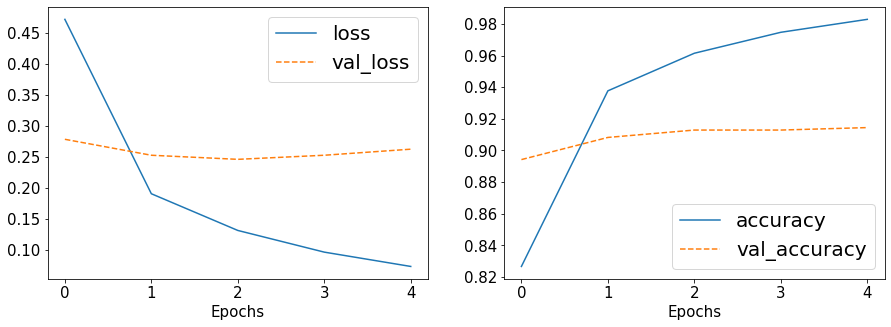

In [185]:
model_mobile = train_and_evaluate_mobile(l2=0)

Gaunasi geresnis rezultatas su l2=0.0001

## MobileNet V3 modelis

In [203]:
# parameterize to the values in the previous cell
def train_and_evaluate_mobilev3(train_dataset, test_dataset, batch_size = 10,
                       lrate = 0.0005,
                       l1 = 0,
                       l2 = 0.0001,
                       dropout_prob = 0.1,
                       num_hidden = 32):
    
    regularizer = tf.keras.regularizers.l1_l2(l1, l2)

    layers = [
      hub.KerasLayer(
          "https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5",
          input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS),
          trainable=False,
          name='mobilenet_embedding'),
      tf.keras.layers.Dense(num_hidden,
                            kernel_regularizer=regularizer, 
                            activation='relu',
                            name='dense_hidden'),
      tf.keras.layers.Dense(len(sar), 
                            kernel_regularizer=regularizer,
                            activation='softmax',
                            name='clothes_prob')
  ]

    model = tf.keras.Sequential(layers, name='clothes_classification')
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lrate),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(
                    from_logits=False),
                metrics=['accuracy'])
    print(model.summary())
    history = model.fit(train_dataset, validation_data=test_dataset, epochs=5)
    training_plot(['loss', 'accuracy'], history)
    return model

Model: "clothes_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_embedding (KerasL  (None, 1280)             4226432   
 ayer)                                                           
                                                                 
 dense_hidden (Dense)        (None, 32)                40992     
                                                                 
 clothes_prob (Dense)        (None, 10)                330       
                                                                 
Total params: 4,267,754
Trainable params: 41,322
Non-trainable params: 4,226,432
_________________________________________________________________
None
Epoch 1/5
257/257 [==============================] - 104s 387ms/step - loss: 0.4976 - accuracy: 0.8403 - val_loss: 0.2408 - val_accuracy: 0.9207
Epoch 2/5
257/257 [==============================] - 92s 359ms/step - loss: 0

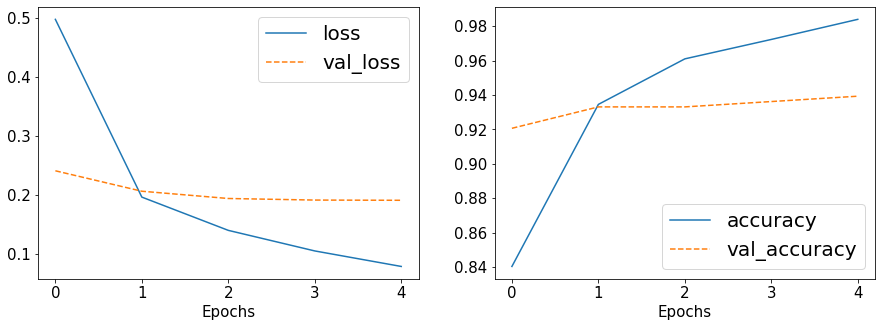

In [205]:
model_mobilev3 = train_and_evaluate_mobilev3( train_dataset=train_dataset, test_dataset=test_dataset)

V3 modelio tikslumas beveik 94% po 5 epochų. Tai labai geras modelis. Renkuosi V3, kaip geriausią modelį. Jį panaudosiu ir pridėjusi daugiau drabužių kategorijų. 

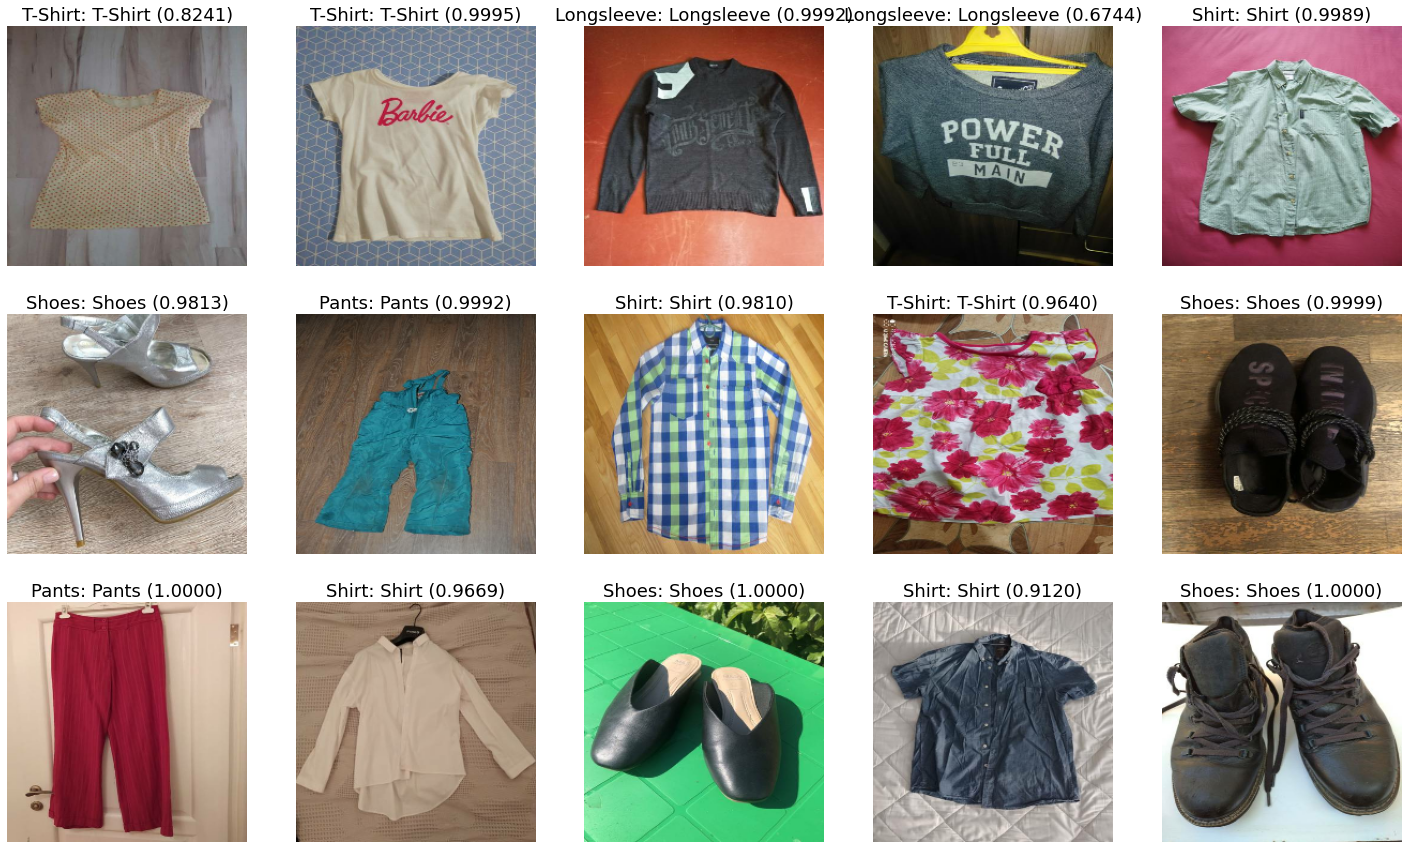

In [206]:
plot_predictions(model_mobile, "test.csv")

Iš 15 pavaizduotų nuotraukų, Mobile Net V3 modelis visas sukategorizavo teisingai. Ir visur tikimybė didesnė nei 50%.

# Pridėsiu daugiau kategorijų treniravimui ir tada pažiūrėsiu ar modelio tikslumas labai keičiasi.

In [193]:
data_new.label.value_counts()

T-Shirt       1011
Longsleeve     699
Pants          692
Shoes          431
Shirt          378
Dress          357
Outwear        312
Shorts         308
Hat            171
Skirt          155
Polo           120
Undershirt     118
Blazer         109
Hoodie         100
Body            69
Top             43
Blouse          23
Name: label, dtype: int64

In [208]:
sar=["T-Shirt", "Longsleeve", "Pants", "Shoes", "Shirt", "Dress", "Outwear", "Shorts", "Hat", "Skirt"]
len(sar)

10

In [209]:
small_data10=data_new.loc[data_new.label.isin(sar)]
small_data10

index                                 image  sender_id    label   kids  \
0         1  ea7b6656-3f84-4eb3-9099-23e623fc1018        148  T-Shirt  False   
1         3  ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa         43  T-Shirt  False   
2         4  3b86d877-2b9e-4c8b-a6a2-1d87513309d0        189    Shoes  False   
3         5  5d3a1404-697f-479f-9090-c1ecd0413d27        138   Shorts  False   
4         6  b0c03127-9dfb-4573-8934-1958396937bf        138    Shirt  False   
...     ...                                   ...        ...      ...    ...   
5090   5397  3855ea22-5e7f-411f-b1fa-6db27a676c06        204    Shoes   True   
5091   5398  dfd4079d-967b-4b3e-8574-fbac11b58103        204   Shorts  False   
5093   5400  5379356a-40ee-4890-b416-2336a7d84061        310   Shorts  False   
5094   5401  65507fb8-3456-4c15-b53e-d1b03bf71a59        204    Shoes  False   
5095   5402  32b99302-cec7-4dec-adfa-3d4029674209        204    Skirt  False   

                                                photo  
0     images/ea7b6656-3f84-4eb3-9099-23e623fc1018.jpg  
1     images/ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa.jpg  
2     images/3b86d877-2b9e-4c8b-a6a2-1d87513309d0.jpg  
3     images/5d3a1404-697f-479f-9090-c1ecd0413d27.jpg  
4     images/b0c03127-9dfb-4573-8934-1958396937bf.jpg  
...                                               ...  
5090  images/3855ea22-5e7f-411f-b1fa-6db27a676c06.jpg  
5091  images/dfd4079d-967b-4b3e-8574-fbac11b58103.jpg  
5093  images/5379356a-40ee-4890-b416-2336a7d84061.jpg  
5094  images/65507fb8-3456-4c15-b53e-d1b03bf71a59.jpg  
5095  images/32b99302-cec7-4dec-adfa-3d4029674209.jpg  

[4514 rows x 6 columns]

In [210]:
sd10=small_data10[["photo", "label"]]
sd10

photo    label
0     images/ea7b6656-3f84-4eb3-9099-23e623fc1018.jpg  T-Shirt
1     images/ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa.jpg  T-Shirt
2     images/3b86d877-2b9e-4c8b-a6a2-1d87513309d0.jpg    Shoes
3     images/5d3a1404-697f-479f-9090-c1ecd0413d27.jpg   Shorts
4     images/b0c03127-9dfb-4573-8934-1958396937bf.jpg    Shirt
...                                               ...      ...
5090  images/3855ea22-5e7f-411f-b1fa-6db27a676c06.jpg    Shoes
5091  images/dfd4079d-967b-4b3e-8574-fbac11b58103.jpg   Shorts
5093  images/5379356a-40ee-4890-b416-2336a7d84061.jpg   Shorts
5094  images/65507fb8-3456-4c15-b53e-d1b03bf71a59.jpg    Shoes
5095  images/32b99302-cec7-4dec-adfa-3d4029674209.jpg    Skirt

[4514 rows x 2 columns]

In [211]:
train, test = train_test_split(sd10, test_size=0.2, random_state=100)

In [212]:
train.to_csv('train10.csv', index=False, header=False) # issaugau nauja csv faila, kad paskui galeciau ta dataset naudoti modeliui
test.to_csv('test10.csv', index=False, header=False)

In [213]:
train_dataset10 = (tf.data.TextLineDataset(
    "train10.csv").map(decode_csv)).batch(10)

test_dataset10 = (tf.data.TextLineDataset(
    "test10.csv").map(decode_csv)).batch(10)

Model: "clothes_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_embedding (KerasL  (None, 1280)             4226432   
 ayer)                                                           
                                                                 
 dense_hidden (Dense)        (None, 32)                40992     
                                                                 
 clothes_prob (Dense)        (None, 10)                330       
                                                                 
Total params: 4,267,754
Trainable params: 41,322
Non-trainable params: 4,226,432
_________________________________________________________________
None
Epoch 1/5
362/362 [==============================] - 147s 392ms/step - loss: 0.7929 - accuracy: 0.7333 - val_loss: 0.5455 - val_accuracy: 0.8162
Epoch 2/5
362/362 [==============================] - 135s 373ms/step - loss: 

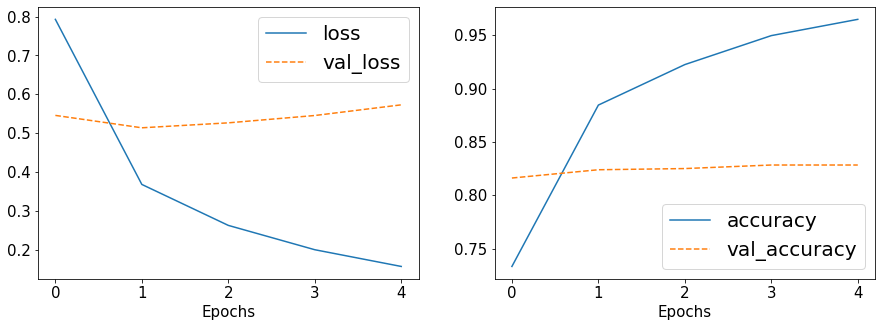

In [214]:
model_mobilev3_10 = train_and_evaluate_mobilev3(train_dataset=train_dataset10, test_dataset=test_dataset10)

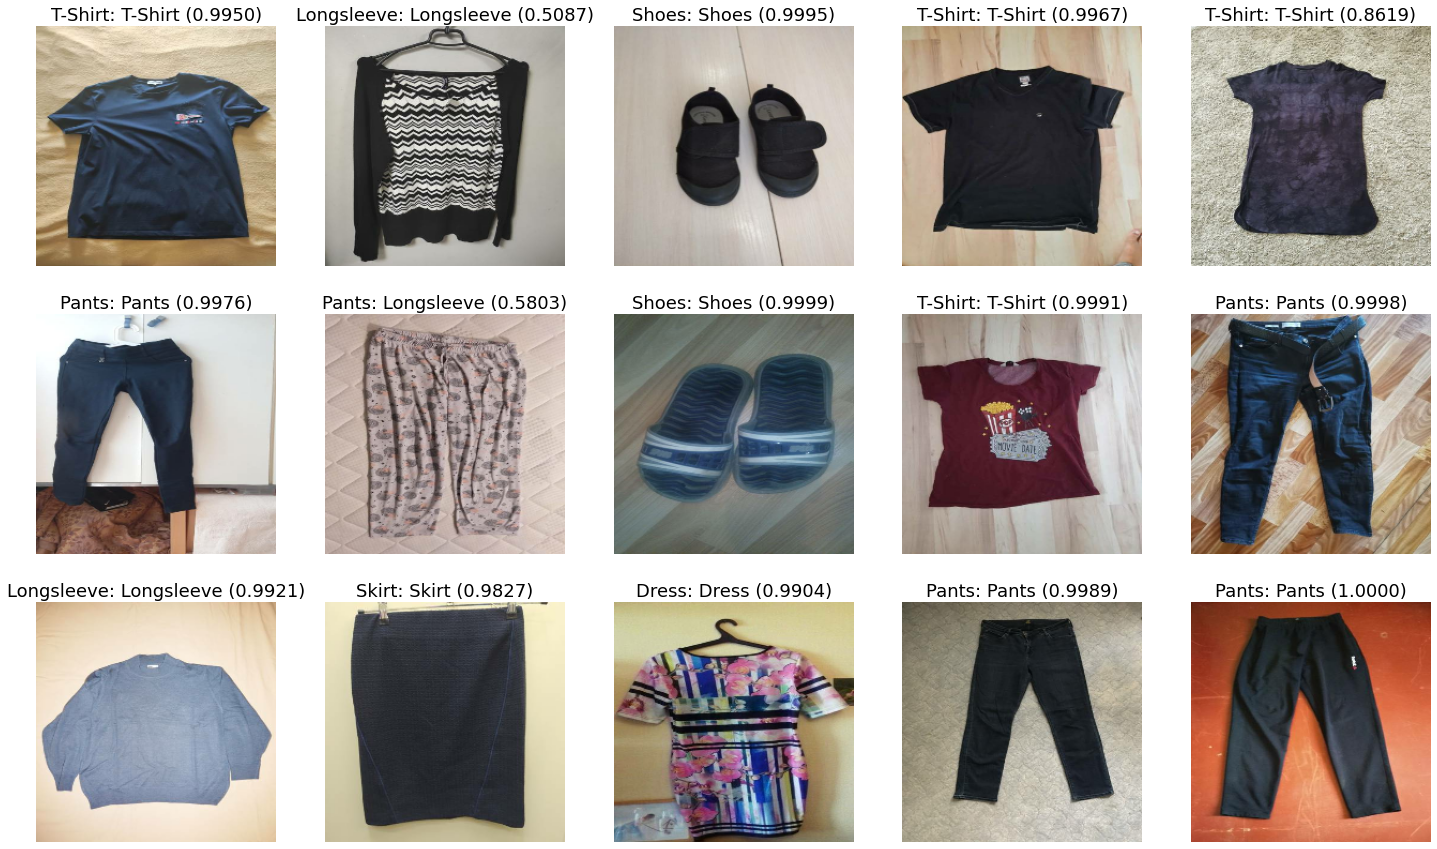

In [216]:
plot_predictions(model_mobilev3_10, "test10.csv")

Šiuo atveju su 10 kategorijų, modelio tikslumas yra mažesnis, tik apie 82%. Iš nuotraukų galime matyti, kad yra viena klaida, vienas kelnes modelis prognozuoja, kaip marškinėlius ilgomis rankovėmis

Model: "clothes_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_embedding (KerasL  (None, 1280)             4226432   
 ayer)                                                           
                                                                 
 dense_hidden (Dense)        (None, 32)                40992     
                                                                 
 clothes_prob (Dense)        (None, 10)                330       
                                                                 
Total params: 4,267,754
Trainable params: 41,322
Non-trainable params: 4,226,432
_________________________________________________________________
None
Epoch 1/5
362/362 [==============================] - 143s 381ms/step - loss: 0.8909 - accuracy: 0.7305 - val_loss: 0.6412 - val_accuracy: 0.8051
Epoch 2/5
362/362 [==============================] - 158s 438ms/step - loss: 

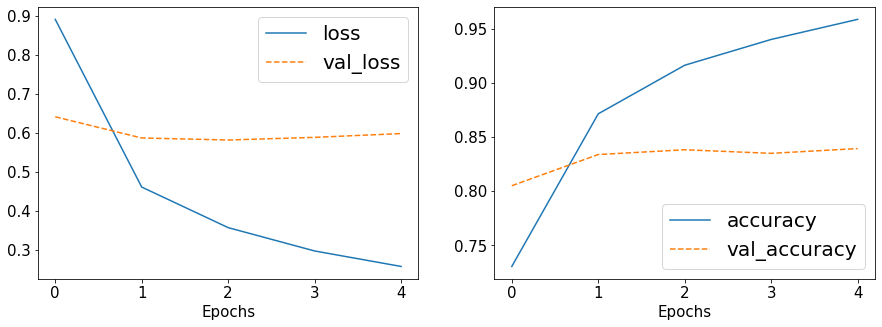

In [247]:
model_mobilev3_102 = train_and_evaluate_mobilev3(l2=0.001, train_dataset=train_dataset10, test_dataset=test_dataset10)

In [245]:
# parameterize to the values in the previous cell
def train_and_evaluate_mobile(batch_size = 16,
                       lrate = 0.0005,
                       l1 = 0,
                       l2 = 0.001,
                       dropout_prob = 0.1,
                       num_hidden = 32):
    regularizer = tf.keras.regularizers.l1_l2(l1, l2)
    
    train_dataset10 = (tf.data.TextLineDataset(
    "train10.csv").map(decode_csv)).batch(batch_size)

    test_dataset10 = (tf.data.TextLineDataset(
    "test10.csv").map(decode_csv)).batch(batch_size)

    layers = [
      hub.KerasLayer(
          "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
          input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS),
          trainable=False,
          name='mobilenet_embedding'),
      tf.keras.layers.Dense(num_hidden,
                            kernel_regularizer=regularizer, 
                            activation='relu',
                            name='dense_hidden'),
      tf.keras.layers.Dense(len(sar), 
                            kernel_regularizer=regularizer,
                            activation='softmax',
                            name='clothes_prob')
  ]

    model = tf.keras.Sequential(layers, name='clothes_classification')
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lrate),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(
                    from_logits=False),
                metrics=['accuracy'])
    print(model.summary())
    history = model.fit(train_dataset10, validation_data=test_dataset10, epochs=5)
    training_plot(['loss', 'accuracy'], history)
    return model

Model: "clothes_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_embedding (KerasL  (None, 1280)             2257984   
 ayer)                                                           
                                                                 
 dense_hidden (Dense)        (None, 32)                40992     
                                                                 
 clothes_prob (Dense)        (None, 10)                330       
                                                                 
Total params: 2,299,306
Trainable params: 41,322
Non-trainable params: 2,257,984
_________________________________________________________________
None
Epoch 1/5
362/362 [==============================] - 178s 466ms/step - loss: 0.9855 - accuracy: 0.6873 - val_loss: 0.6399 - val_accuracy: 0.7829
Epoch 2/5
362/362 [==============================] - 154s 426ms/step - loss: 

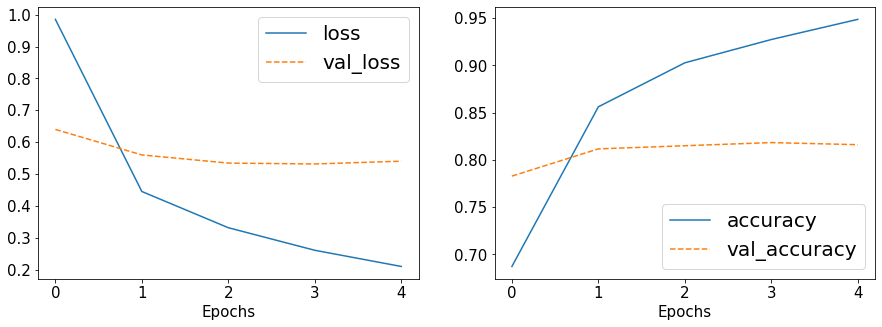

In [246]:
model_mobilev2 = train_and_evaluate_mobile()